In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

In [1]:
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [2]:
filename='denoised/flow_/s1_bbaf3s.csv'
data=pd.read_csv(filename)

In [3]:
# convert timestemps in second
data.timestamp=data.apply(lambda x: x.timestamp*1e-6,axis=1)

In [4]:
last_time=data.iloc[-1].timestamp
windows_shift=0.01
n_fft=512
n_frames=math.ceil(last_time/windows_shift)
print('Number of frames = ',n_frames)

times=[windows_shift*i for i in range(n_frames)]
indices=[i for i in range(n_frames-1)]
data['frame_index']=pd.cut(data['timestamp'],times,labels=indices,include_lowest=True)
#data['frame_index']=pd.cut(data['timestamp'],times,include_lowest=True)
data.head(20)


Number of frames =  300


,timestamp,X,VX,Y,VY,frame_index
0,0.061910,161,-119.579000,47,-128.29400,6
1,0.066474,164,0.005724,195,-39.50900,6
2,0.090323,130,19.157600,182,-29.78690,9
3,0.092658,165,-130.162000,57,-60.73300,9
4,0.094525,193,2.887540,121,41.19350,9
5,0.096809,134,-68.699800,130,-9.21769,9
6,0.098670,161,89.052200,59,12.75870,9
7,0.102089,165,21.408800,59,-66.19800,10
8,0.102387,163,123.963000,59,3.76833,10
9,0.102606,133,-41.186100,130,-3.27491,10


In [5]:
# convert velocities to pixel/second to pixel/windows_shift
data['VX']=data.apply(lambda x: x['VX']*windows_shift,axis=1)
data['VY']=data.apply(lambda x: x['VY']*windows_shift,axis=1)

# add speed
data['speed']=np.sqrt(data.VX**2+data.VY**2)

In [6]:
frames=data.groupby('frame_index',observed=True)

In [7]:
# number of event per frame
non_empty_frames=[k for k in frames.indices]
mean=0.0
for frame in non_empty_frames:
    #print(frame,len(frames.get_group(frame)))
    mean+=len(frames.get_group(frame))
print('average number of events per frame = ',mean/len(non_empty_frames))
print(non_empty_frames)

average number of events per frame =  333.3676975945017
[6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 21

In [8]:
num_previous_frames=5
frames_aggregation=dict()
for frame in non_empty_frames:
    frames_aggregation[frame]=[i for i in non_empty_frames 
                             if i<=frame and i >frame-num_previous_frames]

cm=(154.5,88.5)
cm_v = (0.09502797499999999,0.10910471666666664)


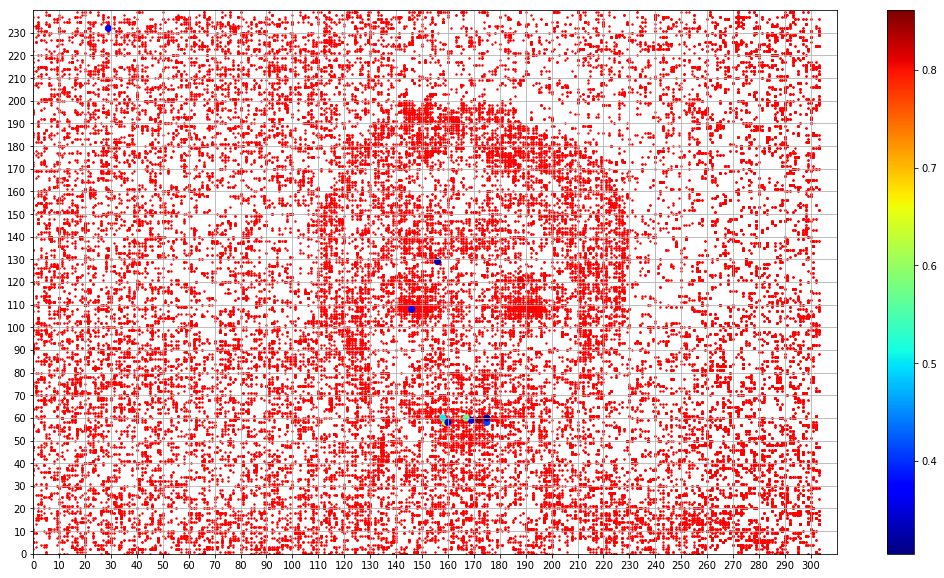

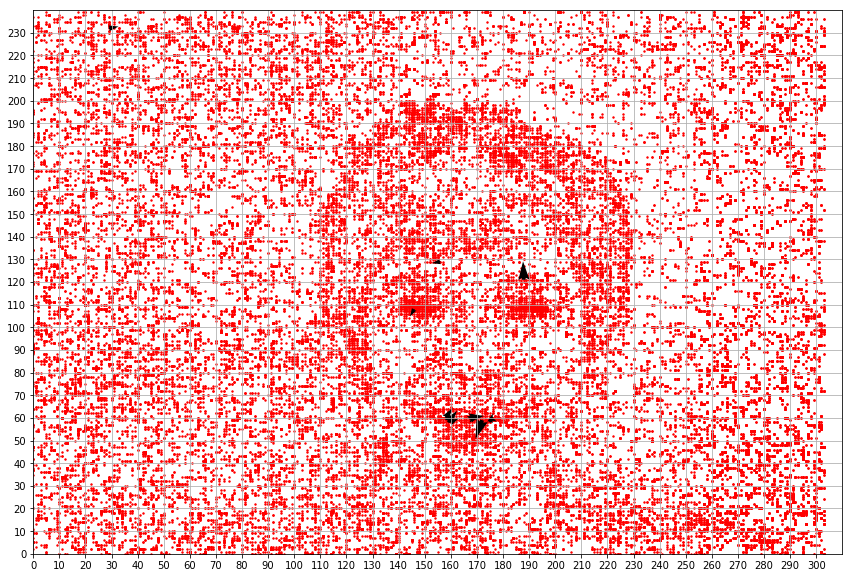

In [10]:
%matplotlib inline

def print_multiple_frames(frame_start,frame_end,speed_threshold):

    subset=data.loc[(data['frame_index']<=frame_end) & (data['frame_index']>=frame_start)]

    subset=subset[subset.speed>speed_threshold]
    x=subset['X']
    vx=subset['VX']
    y=subset['Y']
    vy=subset['VY']
    speed=subset['speed']
    
    #f=plt.figure(figsize=(18,10))
    #plt.hist(vx)
    #plt.hist(vy)

    xmax=310
    ymax=240
    #xmax=160
    #ymax=160
    
    x_ticks=[i for i in range(0,xmax,10)]
    y_ticks=[i for i in range(0,ymax,10)]
    

    #find_point=subset.loc[(subset['X']<200) & (subset['X']>190) & (subset['Y']>180) & (subset['Y']<190)]
    #print(find_point)
    ##############################
    ###############################
    
    f=plt.figure(figsize=(18,10))
    
    plt.scatter(data.X.values,data.Y.values,c='r',s=2.0)
    
    plt.scatter(x.values,y.values,c=speed.values,cmap='jet')
    
    plt.xticks(x_ticks)
    plt.yticks(y_ticks)
    
    plt.colorbar()
    plt.grid()
    plt.xlim(0,xmax)
    plt.ylim(0,ymax)
    
    ################################
    ################################
    
    f=plt.figure(figsize=(14.5,10))
    
    plt.scatter(data.X.values,data.Y.values,c='r',s=2.0)
    
    
    X=x.values
    Y=y.values
    U=vx.values*10
    V=vy.values*10
    
    plt.quiver(X,Y,U,V,angles='xy',scale_units='xy', scale=1)
    #plt.quiver(X,Y,U,V,angles='xy')
    
    x_cm=x.mean(axis=0)
    y_cm=y.mean(axis=0)
    
    vx_cm=vx.mean(axis=0)
    vy_cm=vy.mean(axis=0)
    
    X , Y , U , V = x_cm, y_cm , vx_cm , vy_cm
    plt.quiver(X,Y,U,V,color='r',angles='xy',scale_units='xy', scale=1)
    
    print('cm=({},{})'.format(x_cm,y_cm))
    print('cm_v = ({},{})'.format(vx_cm,vy_cm))
    
    #f=plt.figure(figsize=(14.5,10))
    X=x.values
    Y=y.values
    vx_diff=np.subtract(vx.values,vx_cm)
    vy_diff=np.subtract(vy.values,vy_cm)
    
    
    U=vx_diff
    V=vy_diff
    
    #plt.quiver(X,Y,U,V,color='r',angles='xy')
    
    plt.xticks(x_ticks)
    plt.yticks(y_ticks)
    plt.grid()
    
    plt.xlim(0,xmax)
    plt.ylim(0,ymax)
    
    #plt.xlim(50,200)
    #plt.ylim(0,ymax)
    
    
print_multiple_frames(90,95,0.3)

In [ ]:
%matplotlib notebook

def plot_vector_field(frame_start,frame_end,speed_threshold):

    subset=data.loc[(data['frame_index']<=frame_end) & (data['frame_index']>=frame_start)]

    subset=subset[subset.speed>speed_threshold]
    x=subset['X']
    vx=subset['VX']
    y=subset['Y']
    vy=subset['VY']
    speed=subset['speed']
    

    xmax=310
    ymax=240
    #xmax=160
    #ymax=160
    
    x_ticks=[i for i in range(0,xmax,10)]
    y_ticks=[i for i in range(0,ymax,10)]
    
    ################################
    ################################
    
    f=plt.figure(figsize=(14.5,10))
    X=x.values
    Y=y.values
    U=vx.values
    V=vy.values
    
    plt.scatter(data.X.values,data.Y.values,s=2.0,c='r')
    
    plt.scatter(x,y,c='b',s=3.0)
    plt.quiver(X,Y,U,V,angles='xy',scale_units='xy', scale=0.1)
    #plt.quiver(X,Y,U,V,angles='xy')
    
    #################################
    
    x_cm=x.mean(axis=0)
    y_cm=y.mean(axis=0)
    
    vx_cm=vx.mean(axis=0)
    vy_cm=vy.mean(axis=0)
    
    ##################################
    vx_diff=np.subtract(vx.values,vx_cm)
    vy_diff=np.subtract(vy.values,vy_cm)
    
    X=x.values
    Y=y.values
    U=vx_diff
    V=vy_diff
    plt.quiver(X,Y,U,V,color='b',angles='xy',scale_units='xy', scale=0.1)
    
    ######################################
    X , Y , U , V = x_cm, y_cm , vx_cm , vy_cm
    plt.quiver(X,Y,U,V,color='g',angles='xy',scale_units='xy', scale=0.1)
    
    plt.xticks(x_ticks)
    plt.yticks(y_ticks)
    plt.grid()
    
    plt.xlim(0,xmax)
    plt.ylim(0,ymax)
    
    #plt.xlim(50,200)
    #plt.ylim(0,ymax)
    
    
plot_vector_field(170,177,0.2)

{91, 92, 93, 94, 95}


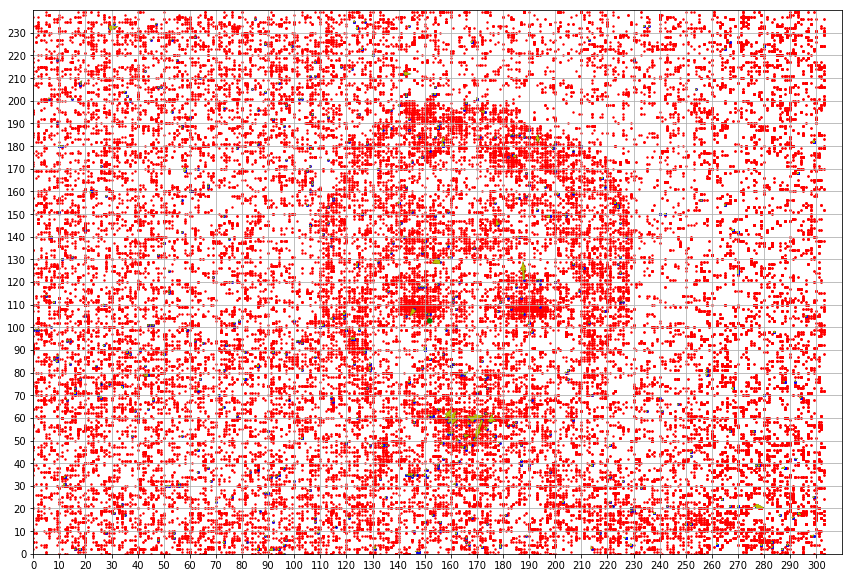

In [18]:
def plot_frames_aggregation(frame_index):
    
    subset=[]
    for previous_frame in frames_aggregation[frame_index]:
        subset.append(frames.get_group(previous_frame))
    subset=pd.concat(subset,axis=0,ignore_index=True)
    
    previous_frames=set(subset.frame_index.values)
    print(previous_frames)
    
    x=subset['X']
    vx=subset['VX']
    y=subset['Y']
    vy=subset['VY']
    speed=subset['speed']
    

    xmax=310
    ymax=240
    #xmax=160
    #ymax=160
    
    x_ticks=[i for i in range(0,xmax,10)]
    y_ticks=[i for i in range(0,ymax,10)]
    
    ################################
    ################################
    
    f=plt.figure(figsize=(14.5,10))
    X=x.values
    Y=y.values
    U=vx.values
    V=vy.values
    
    plt.scatter(data.X.values,data.Y.values,s=2.0,c='r')
    
    plt.scatter(x,y,c='b',s=3.0)
    plt.quiver(X,Y,U,V,angles='xy',scale_units='xy', scale=0.1)
    #plt.quiver(X,Y,U,V,angles='xy')
    
    #################################
    
    x_cm=x.mean(axis=0)
    y_cm=y.mean(axis=0)
    
    vx_cm=vx.mean(axis=0)
    vy_cm=vy.mean(axis=0)
    
    ##################################
    vx_diff=np.subtract(vx.values,vx_cm)
    vy_diff=np.subtract(vy.values,vy_cm)
    
    X=x.values
    Y=y.values
    U=vx_diff
    V=vy_diff
    plt.quiver(X,Y,U,V,color='y',angles='xy',scale_units='xy', scale=0.1)
    
    ######################################
    X , Y , U , V = x_cm, y_cm , vx_cm , vy_cm
    plt.quiver(X,Y,U,V,color='g',angles='xy',scale_units='xy', scale=0.1)
    
    plt.xticks(x_ticks)
    plt.yticks(y_ticks)
    plt.grid()
    
    plt.xlim(0,xmax)
    plt.ylim(0,ymax)
    
    #plt.xlim(50,200)
    #plt.ylim(0,ymax)

plot_frames_aggregation(95)

In [ ]:
def print_multiple_frames_spatial_average(frame_start,frame_end,speed_threshold):
    
    subset=data.loc[(data['frame_index']<=frame_end) & (data['frame_index']>=frame_start)]
    
    xmax=310
    ymax=250
    
    x_boxes=[i for i in range(0,xmax+1,10)]
    y_boxes=[i for i in range(0,ymax+1,10)]
    
    x_boxes_index=[i for i in range(len(x_boxes)-1)]
    y_boxes_index=[i for i in range(len(y_boxes)-1)]
    
    frames = subset.groupby('frame_index',observed=True)
    non_empty_frames=[k for k in frames.indices]
    
    result=dict()
    
    for frame in non_empty_frames:
        frame_data=frames.get_group(frame)
        
        frame_data['X_box'] = pd.cut(frame_data['X'],x_boxes,labels=x_boxes_index,include_lowest=True)
        frame_data['Y_box'] = pd.cut(frame_data['Y'],y_boxes,labels=y_boxes_index,include_lowest=True)
        print(frame_data)
        
        frame_data_boxed = frame_data.groupby(['X_box','Y_box'],observed=True)
        
        grid=dict()
        
        # spatial average over boxes
    
        for k in frame_data_boxed.indices:
            print('grid indices = ',k)
            print('x center = ',x_boxes[k[0]]+5.0)
            print('y center = ',y_boxes[k[1]]+5.0)
            box=frame_data_boxed.get_group(k)
            vx_box=box.VX.mean()
            vy_box=box.VY.mean()
            
            grid[k]={'x':x_boxes[k[0]]+5.0,
                    'y':y_boxes[k[1]]+5.0,
                    'vx':vx_box,
                    'vy':vy_box}
    
        #print(grid)
            
            
    
print_multiple_frames_spatial_average(150,151,20)

In [ ]:
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff

init_notebook_mode(connected=True)

def plot_multiple_frames_vector_field(frame_start,frame_end,speed_threshold):
    
    subset=data.loc[(data['frame_index']<=frame_end) & (data['frame_index']>=frame_start)]

    subset=subset[subset.speed>speed_threshold]
    x=subset['X']
    vx=subset['VX']
    y=subset['Y']
    vy=subset['VY']
    speed=subset['speed']
    
    fig = ff.create_quiver(x, y, vx, vy,scale=1.0,)
    iplot(fig, filename='Quiver Plot Example')
    
plot_multiple_frames_vector_field(200,220,0)

In [19]:
import cv2

ModuleNotFoundError: No module named 'cv2'